# Sprint 3 Feature Selection and Engineering using Python

## Load Library

In [37]:
# Import library
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter 
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder,  LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier

## Load Data and Perform Data
Check the available columns in the dataset

In [38]:
df = pd.read_csv("C:/Users/User/Downloads/Travel_Insurance.csv")
df.columns

Index(['Agency', 'Agency Type', 'Distribution Channel', 'Product Name',
       'Claim', 'Duration', 'Destination', 'Net Sales', 'Commision (in value)',
       'Gender', 'Age'],
      dtype='object')

## 1. Missing Value Treatment

In [6]:
df.columns[df.isnull().any()]

Index(['Gender'], dtype='object')

In [7]:
df.isnull().any()

Agency                  False
Agency Type             False
Distribution Channel    False
Product Name            False
Claim                   False
Duration                False
Destination             False
Net Sales               False
Commision (in value)    False
Gender                   True
Age                     False
dtype: bool

In [8]:
df.isnull().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

The reason of not replacing the missing for Gender is because the percentage of missing value is too high.

we can delete column Gender since it contain missing value and we do not require it in modelling and evaluation

In [9]:
column_df = df.dropna(axis=1)
column_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 4.8+ MB


Otherwise, we can delete entire row with missing value. In this way we can achive better accuracy but we would lose large amount of data due to high percentage of missing value. Hence we only delete the column 'Gender'

In [143]:
df = df.drop(['Gender'], axis=1)

## 2. Outlier Analysis

In [145]:
from collections import Counter

def detect_outliers(df, features):
    outlier_indices = []
    
    for c in features:
        #1st quartile
        Q1 =  np.percentile(df[c],25)
        #3rd quartile
        Q3 = np.percentile(df[c],75)
        #IQR
        IQR = Q3 - Q1
        #outlier step
        outlier_step = IQR * 1.5
        #detect outlier and their indices
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indices 
        outlier_indices.extend(outlier_list_col)
   
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    return multiple_outliers

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  float64
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Age                   63326 non-null  int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 4.8+ MB


In [147]:
detect_outliers(df,["Duration","Net Sales","Commision (in value)","Age"])

[0,
 1,
 9,
 20,
 24,
 25,
 251,
 252,
 253,
 254,
 394,
 396,
 414,
 424,
 425,
 426,
 427,
 607,
 613,
 780,
 781,
 806,
 807,
 809,
 810,
 941,
 1228,
 1259,
 1399,
 1409,
 1413,
 1583,
 1596,
 1600,
 1603,
 1773,
 1780,
 2216,
 2217,
 2222,
 2338,
 2361,
 2362,
 2363,
 2543,
 2722,
 2723,
 2724,
 2725,
 2736,
 2737,
 2907,
 2916,
 3062,
 3304,
 3308,
 3310,
 3428,
 3429,
 3430,
 3449,
 3610,
 3611,
 3612,
 3613,
 3769,
 3770,
 3771,
 3772,
 3930,
 3949,
 4051,
 4052,
 4068,
 4069,
 4070,
 4071,
 4160,
 4289,
 4420,
 4421,
 4429,
 4552,
 4553,
 4719,
 4722,
 4724,
 4726,
 4732,
 4734,
 4763,
 4764,
 4945,
 4946,
 4947,
 5163,
 5164,
 5165,
 5166,
 5192,
 5436,
 5437,
 5438,
 5439,
 5599,
 5600,
 5601,
 5801,
 5802,
 5816,
 5996,
 6211,
 6212,
 6213,
 6404,
 6574,
 6575,
 6576,
 6711,
 6715,
 6878,
 6879,
 6983,
 7101,
 7102,
 7116,
 7266,
 7267,
 7268,
 7269,
 7276,
 7492,
 7493,
 7494,
 7495,
 7496,
 7508,
 7666,
 7679,
 7680,
 7698,
 7816,
 7826,
 7922,
 7924,
 7940,
 7941,
 8115,

In [148]:
df.loc[detect_outliers(df,["Duration","Net Sales","Commision (in value)","Age"])] 

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186.0,MALAYSIA,-29.00,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186.0,MALAYSIA,-29.00,9.57,71
9,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,186.0,AUSTRALIA,-99.00,59.40,37
20,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,136.0,NORWAY,-108.90,65.34,32
24,C2B,Airlines,Online,Silver Plan,No,190.0,SINGAPORE,294.75,73.69,26
...,...,...,...,...,...,...,...,...,...,...
61784,JWT,Airlines,Online,Value Plan,No,31.0,INDIA,120.00,48.00,118
61878,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,62.0,AUSTRALIA,99.00,59.40,57
61985,ADM,Travel Agency,Online,Premier Plan,No,54.0,FRANCE,147.00,55.86,21
62573,C2B,Airlines,Online,Silver Plan,No,73.0,SINGAPORE,200.50,50.13,58


In [149]:
# we can choose to drop the outlier, however since it will lose large amount of data, we keep the outlier
# df_1 = df.drop(detect_outliers(df,["Duration","Net Sales","Commision (in value)","Age"]), axis=0).reset_index(drop = True )

In [150]:
df[["Duration","Net Sales","Commision (in value)","Age"]].describe()

,Duration,Net Sales,Commision (in value),Age
count,63326.000000,63326.000000,63326.000000,63326.000000
mean,49.321062,40.702018,9.225666,39.969981
std,101.790576,48.845637,19.389786,14.017010
min,0.000000,-389.000000,0.000000,0.000000
25%,9.000000,18.000000,0.000000,35.000000
50%,22.000000,26.530000,0.000000,36.000000
75%,53.000000,48.000000,10.500000,43.000000
max,4881.000000,810.000000,283.500000,118.000000


In [151]:
columns = ["Duration","Net Sales","Commision (in value)","Age"]

for x in columns:
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1
    print(x,":", ((df[x] < (Q1 - 1.5 * IQR)) | (df[x] > (Q3 + 1.5 * IQR))).sum())

Duration : 5566
Net Sales : 5543
Commision (in value) : 6745
Age : 7422


In [152]:
df['Duration'].describe()

count    63326.000000
mean        49.321062
std        101.790576
min          0.000000
25%          9.000000
50%         22.000000
75%         53.000000
max       4881.000000
Name: Duration, dtype: float64

Since 'Duration' cannot have negative values, we will replace all negative values in 'Duration' with their mean value

In [153]:
df.loc[df['Duration'] < 0, 'Duration'] = 49.317

There are some columns have 'Net Sales' = 0.0 but positive 'Commision (in value)' but it is illogical, we would replace all these values with 0

In [154]:
df.loc[df['Net Sales'] == 0.0, 'Commision (in value)'] = 0

## 3. Data Transformation

In [155]:
df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186.0,MALAYSIA,-29.0,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186.0,MALAYSIA,-29.0,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65.0,AUSTRALIA,-49.5,29.70,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60.0,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79.0,ITALY,-19.8,11.88,41


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  float64
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Age                   63326 non-null  int64  
dtypes: float64(3), int64(1), object(6)
memory usage: 4.8+ MB


In [158]:
X = df.drop(['Claim'],axis=1)
y = df['Claim']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

enc = OneHotEncoder(handle_unknown='ignore')
X_train = enc.fit_transform(X_train)
X_test = enc.transform(X_test)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

In [159]:
lr = LogisticRegression()
# fit on the training set
lr.fit(X_train, y_train)
# predict on test set
yhat = lr.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 98.47


c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [160]:
from sklearn.linear_model import SGDClassifier

sgd =  SGDClassifier()
# fit on the training set
sgd.fit(X_train, y_train)
# predict on test set
yhat = sgd.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 98.47


In [161]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()
# fit on the training set
decision_tree.fit(X_train, y_train)
# predict on test set
yhat = decision_tree.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 97.80


In [162]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
# fit on the training set
random_forest.fit(X_train, y_train)
# predict on test set
yhat = random_forest.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
# cv = cross_val_score(random_forest, X_train, y_train,cv=5)
# print('cross validation score of: %.2f' % (cv.mean()*100))
score = random_forest.score(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100) + ', score of: %.2f' % (score*100))

Accuracy: 98.35, score of: 98.35


In [163]:
from sklearn.svm import SVC

svc = SVC(probability = True, C = 1, kernel='linear')
svc.fit(X_train, y_train)
yhat = svc.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
# cv = cross_val_score(random_forest, X_train, y_train,cv=5)
# print('cross validation score of: %.2f' % (cv.mean()*100))
score = svc.score(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100) + ', score of: %.2f' % (score*100))

Accuracy: 98.44, score of: 98.44


In [164]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'saga', 'sag']
penalty = ['l1', 'l2', 'elasticnet']
c_values = [100, 80, 50, 30, 10, 5.0, 3.0, 1.0, 0.1, 0.2, 0.3, 0.6, 0.01, 0.02, 0.03, 0.001]
tolerant = [0.1, 0.001, 0.001, 0.0015, 0.0001, 0.00013, 0.00001, 0.000001]
max_iter = [100, 500, 1000, 5000, 10000, 50000]
multi_class = ['auto', 'ovr', 'multinomial']

grid = dict(solver=solvers,penalty=penalty,C=c_values, tol=tolerant, max_iter=max_iter, multi_class=multi_class)
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=123)
model = LogisticRegression()

lr_random = RandomizedSearchCV(estimator = model, param_distributions = grid, 
                                cv = 7, verbose=0, scoring="accuracy")
lr_random.fit(X_train, y_train)
print(lr_random.best_params_)

c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:352: ConvergenceWarning: The max_iter was re

{'tol': 0.0001, 'solver': 'saga', 'penalty': 'l2', 'multi_class': 'multinomial', 'max_iter': 10000, 'C': 0.3}


In [165]:
lr = LogisticRegression(tol=0.0001, solver='newton-cg', penalty='l2', multi_class='auto',max_iter=5000, C=0.1)
# fit on the training set
lr.fit(X_train, y_train)
# predict on test set
yhat = lr.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 98.47


In [166]:
svc = SVC(C = 100, kernel='poly', gamma=0.01, degree=1)
svc.fit(X_train, y_train)
yhat = svc.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
# cv = cross_val_score(random_forest, X_train, y_train,cv=5)
# print('cross validation score of: %.2f' % (cv.mean()*100))
score = svc.score(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100) + ', score of: %.2f' % (score*100))

Accuracy: 98.44, score of: 98.44


In [168]:
svc = SVC(C = 10, kernel='poly', gamma=0.1, degree=5)
svc.fit(X_train, y_train)
yhat = svc.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
# cv = cross_val_score(random_forest, X_train, y_train,cv=5)
# print('cross validation score of: %.2f' % (cv.mean()*100))
score = svc.score(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100) + ', score of: %.2f' % (score*100))

Accuracy: 98.28, score of: 98.28


## 4. New Feature (if any)

#We can check whether a rows is duplicated 
df.duplicated()

updated_df = df.drop_duplicates()

create Family feature
df[''] = df['SibSp'] + df['Parch']
df.head()

## 5. Type of Feature Selection
Filter Method for Feature selection
The filter method ranks each feature based on some uni-variate metric and then selects the highest-ranking features. Here we use two types of feature selection which is chi-square statistics and mutual information statistics. 

Filter Selection Select independent features with:
-No constant Variables
-No/less Quadi-constant variables
-No Duplicate Rows
-High correlation with the target variable
-Low correlation with another independent variable
-Higher information gain or mutual information of the independent variable.

In [170]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder

we hope to find the more relevant features among 7 input variables (from 'Agency' to 'Net Sales') to output variable 'Commision (in value)' by using categorical feature selection

In [171]:
def load_dataset():
	# retrieve numpy array
	dataset = df.values
	# split into input (X) and output (y) variables
	X = dataset[:, :8]
	y = dataset[:,8]
	# format all fields as string
	X = X.astype(str)
	return X, y

In [172]:
# load the dataset
X, y = load_dataset()
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=100, random_state=10)
# summarize
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (63226, 8) (63226,)
Test (100, 8) (100,)


In [173]:
def prepare_inputs(X_train, X_test):
	oe = OrdinalEncoder()
	oe.fit(X_train)
	X_train_enc = oe.transform(X_train)
	X_test_enc = oe.transform(X_test)
	return X_train_enc, X_test_enc

In [174]:
# prepare target
def prepare_targets(y_train, y_test):
	le = LabelEncoder()
	le.fit(y_train)
	y_train_enc = le.transform(y_train)
	y_test_enc = le.transform(y_test)
	return y_train_enc, y_test_enc

In [175]:
# prepare input data
X_train_enc, X_test_enc = prepare_inputs(X_train, X_test)
# prepare output data
y_train_enc, y_test_enc = prepare_targets(y_train, y_test)

In [176]:
#Chi-Squared Feature Selection
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from matplotlib import pyplot

In [177]:
# feature selection
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=chi2, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 47075.722421
Feature 1: 16606.448093
Feature 2: 679.525283
Feature 3: 183329.119505
Feature 4: 4732.585566
Feature 5: 230768.684993
Feature 6: 255839.698557
Feature 7: 2605208.615581


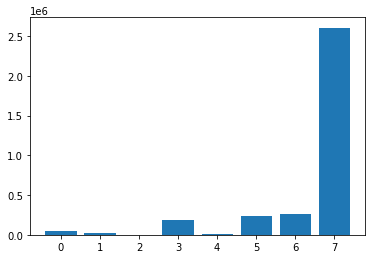

In [178]:
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [179]:
#input feature 3, 5, 6 and 7 are the most relevant 

In [180]:
#Mutual Information Feature Selection
from sklearn.feature_selection import mutual_info_classif
def select_features(X_train, y_train, X_test):
	fs = SelectKBest(score_func=mutual_info_classif, k='all')
	fs.fit(X_train, y_train)
	X_train_fs = fs.transform(X_train)
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 1.390802
Feature 1: 0.575570
Feature 2: 0.257072
Feature 3: 1.474344
Feature 4: 0.010011
Feature 5: 0.217992
Feature 6: 0.722669
Feature 7: 2.313049


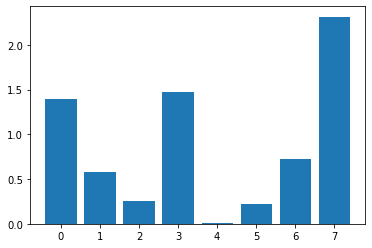

In [181]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train_enc, y_train_enc, X_test_enc)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [182]:
#input feature 0, 3, 6, 7 are most relevant

In both methods feature 3, 6 and 7 achive higher score compared to other feature.
Feature 0 is 'Product Name'
Feature 3 is 'Destination'
Feature 7 is 'Net Sales'
In order to understand their relationship with 'Commission (in value)', further studies and model evaluation should be done with these three features.